In [1]:
import pandas as pd
import sentsim
from pathlib import Path
import os
import seaborn as sns

In [2]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
    
sentsim.set_assets(Path(workbookDir).parent / 'assets' )

sick = pd.read_csv(Path(workbookDir).parent / 'tests' / 'assets' / 'sick.txt', sep='	')
sick

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL
...,...,...,...,...,...
4495,9993,A door is being opened by a man,A bald man in a band is playing guitar in the ...,1.1,NEUTRAL
4496,9997,Someone is boiling okra in a pot,The man is not playing the drums,1.0,NEUTRAL
4497,9998,The man is singing heartily and playing the gu...,A bicyclist is holding a bike over his head in...,1.0,NEUTRAL
4498,9999,A man in blue has a yellow ball in the mitt,A man is jumping rope outside,1.2,NEUTRAL


In [3]:
sick = sick.assign(similarity=sick.apply(lambda x: sentsim.similarity(x['sentence_A'], x['sentence_B']), axis=1))
sick

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,similarity
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.966095
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.839519
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.882792
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.743715
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.768296
...,...,...,...,...,...,...
4495,9993,A door is being opened by a man,A bald man in a band is playing guitar in the ...,1.1,NEUTRAL,0.328630
4496,9997,Someone is boiling okra in a pot,The man is not playing the drums,1.0,NEUTRAL,0.302213
4497,9998,The man is singing heartily and playing the gu...,A bicyclist is holding a bike over his head in...,1.0,NEUTRAL,0.360520
4498,9999,A man in blue has a yellow ball in the mitt,A man is jumping rope outside,1.2,NEUTRAL,0.437865


<AxesSubplot:xlabel='relatedness_score', ylabel='similarity'>

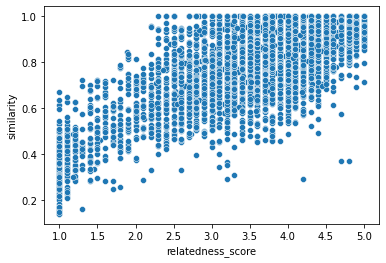

In [4]:
sns.scatterplot(data=sick, x="relatedness_score", y="similarity")

In [5]:
sick['relatedness_score'].corr(sick['similarity'])

0.7173482339222518

Seems like there is a positive correlation between the similarity and the relatedness_score, but we have outliers where the similarity is high but the relatedness is judged to be under 3.0

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
outliers = sick[(sick.relatedness_score < 2.5) & (sick.similarity > .8)]
outliers

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,similarity
184,436,A woman is performing a trick on a ramp with a...,A woman is performing a trick on a ramp with a...,2.400,NEUTRAL,0.933155
243,565,A dark black dog and a light brown dog are pla...,A black man is running in brown grass and raci...,2.000,NEUTRAL,0.814406
266,631,The man is tossing a kid into the swimming poo...,A kid swimming in the ocean is tossing a coin ...,2.200,NEUTRAL,0.958651
367,855,A black and a white dog are joyfully running o...,A black person in white is joyfully running wi...,2.400,NEUTRAL,0.971843
371,862,A black person in white is joyfully running wi...,One white dog and one black one are running si...,2.300,NEUTRAL,0.813668
481,1090,"A large, gray ball is hitting a running dog, w...",A large dog is running on the grass with a ten...,2.450,NEUTRAL,0.881329
508,1154,A man is playing a guitar under a windows,A man is playing a piano,2.400,NEUTRAL,0.830599
674,1541,A man is playing two keyboards,There is no man playing two keyboards,2.400,CONTRADICTION,1.000000
675,1545,A man is playing two keyboards,There is no cat playing a keyboard,2.300,NEUTRAL,0.800999
707,1609,A poor man is being fed snakes and mice,A snake is being fed a mouse by a man,2.300,NEUTRAL,0.944870


Some of the examples seem related but seem like they are contraditionary, its arguiable if this really is related or not but lets see if keeping the stopwords such as no/not improves the score a bit.

In [8]:
sick = sick.assign(similarity_with_stopwords=sick.apply(lambda x: sentsim.similarity(x['sentence_A'], x['sentence_B'], remove_stopwords=False), axis=1))
outliers = sick[(sick.relatedness_score < 2.5) & (sick.similarity_with_stopwords > .8)]
outliers

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,similarity,similarity_with_stopwords
184,436,A woman is performing a trick on a ramp with a...,A woman is performing a trick on a ramp with a...,2.400,NEUTRAL,0.933155,0.951928
235,551,There is no man in a grey t-shirt sitting on a...,A woman is sitting and looking at the waterfall,1.900,NEUTRAL,0.749034,0.809248
243,565,A dark black dog and a light brown dog are pla...,A black man is running in brown grass and raci...,2.000,NEUTRAL,0.814406,0.832449
266,631,The man is tossing a kid into the swimming poo...,A kid swimming in the ocean is tossing a coin ...,2.200,NEUTRAL,0.958651,0.962227
367,855,A black and a white dog are joyfully running o...,A black person in white is joyfully running wi...,2.400,NEUTRAL,0.971843,0.936962
371,862,A black person in white is joyfully running wi...,One white dog and one black one are running si...,2.300,NEUTRAL,0.813668,0.874350
481,1090,"A large, gray ball is hitting a running dog, w...",A large dog is running on the grass with a ten...,2.450,NEUTRAL,0.881329,0.914921
508,1154,A man is playing a guitar under a windows,A man is playing a piano,2.400,NEUTRAL,0.830599,0.826285
626,1434,A man is playing a guitar,A musician is playing a keyboard,2.300,NEUTRAL,0.773655,0.807157
674,1541,A man is playing two keyboards,There is no man playing two keyboards,2.400,CONTRADICTION,1.000000,0.900255


In [9]:
sick['relatedness_score'].corr(sick['similarity_with_stopwords'])

0.7287288304666669

Its a mixed picture, seemas as though the contradiction scores did indeed go do when we kept the stopwords but the some of the other scores went up, but overall the correlation improved